[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/erwincarlogonzales/mldetection-YOLO/blob/main/YOLO_Detection_Counting_MLflow_Experiments_YOLOv11n.ipynb)

# GITHUB SETUP
link: https://github.com/erwincarlogonzales

In [1]:
# Github
from google.colab import userdata

GIT_TOKEN = userdata.get('GITHUB_TOKEN')
GIT_USERNAME = 'erwincarlogonzales'
GIT_REPO = 'yolo-object-counter-mlflow'
CLONE_URL = f"https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPO}.git"

# Clone repo
!git clone '{CLONE_URL}'

Cloning into 'yolo-object-counter-mlflow'...
remote: Enumerating objects: 11867, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 11867 (delta 9), reused 31 (delta 6), pack-reused 11831 (from 4)
Receiving objects: 100% (11867/11867), 363.16 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Updating files: 100% (84/84), done.


In [2]:
# Go to current dir in github
%cd {GIT_REPO}

# dir
!ls -la

/content/yolo-object-counter-mlflow
total 21316
drwxr-xr-x 6 root root    4096 Jun  1 14:45 .
drwxr-xr-x 1 root root    4096 Jun  1 14:44 ..
drwxr-xr-x 8 root root    4096 Jun  1 14:45 .git
-rw-r--r-- 1 root root      66 Jun  1 14:45 .gitattributes
-rw-r--r-- 1 root root     100 Jun  1 14:45 .gitignore
-rw-r--r-- 1 root root    1075 Jun  1 14:45 LICENSE
-rw-r--r-- 1 root root      30 Jun  1 14:45 README.md
drwxr-xr-x 2 root root    4096 Jun  1 14:45 .vscode
-rw-r--r-- 1 root root 5613764 Jun  1 14:45 yolo11n.pt
-rw-r--r-- 1 root root 3247394 Jun  1 14:45 YOLO_Detection_Counting_MLflow_Experiments.ipynb
-rw-r--r-- 1 root root 4571938 Jun  1 14:45 YOLO_Detection_Counting_MLflow_Experiments_v0.ipynb
-rw-r--r-- 1 root root 1765791 Jun  1 14:45 YOLO_Detection_Counting_MLflow_Experiments_v1.ipynb
-rw-r--r-- 1 root root   24069 Jun  1 14:45 YOLO_Detection_Counting_MLflow_Experiments_YOLOv11n.ipynb
drwxr-xr-x 6 root root    4096 Jun  1 14:45 yolov8_colab_runs
-rw-r--r-- 1 root root 6549796 Jun

In [3]:
# Configure Your Git ID
!git config --global user.name "erwincarlogonzales"
!git config --global user.email "erwincarlogonzales@gmail.com"

# GIT COMMIT
- Do not run unless you are going to commit and push

**How to save on GitHub**
1. Go to File > Download.ipynb
2. Go to Folder Icon on the Left and select yolo-object-counter-mlflow folder
3. Click the 3 dots on the right and select Upload
4. Go to where you downloaded the .ipynb and select that
5. This will overwrite the current notebook but you wont see that happen
6. Proceed to !git status to commit and push

In [33]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   YOLO_Detection_Counting_MLflow_Experiments_YOLOv11n.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [34]:
!git add .
!git commit -m 'testing models done, both engine and onnx working'

[main 8ddce3f] testing models done, both engine and onnx working
 1 file changed, 73 insertions(+), 23 deletions(-)


In [35]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 12 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.45 KiB | 46.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/erwincarlogonzales/yolo-object-counter-mlflow.git
   2adaacc..8ddce3f  main -> main


# SETUP & DATASET PREPARATION

In [8]:
# Install Ultralytics & Roboflow
!pip install ultralytics roboflow mlflow onnx onnxruntime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/

In [9]:
# Download Dataset from Roboflow
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("objectdetection-fvcmc").project("hardware-object-detection-xw2gx")
version = project.version(5)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hardware-object-detection-5 in yolov11:: 100%|██████████| 11704/11704 [00:01<00:00, 8245.18it/s]


In [10]:
# Store the path to data.yaml for training
DATASET_YAML = f"{dataset.location}/data.yaml"

# Check of the data.yaml path
print(f"Dataset YAML path: {DATASET_YAML}")
!cat {DATASET_YAML}

Dataset YAML path: /content/yolo-object-counter-mlflow/hardware-object-detection-5/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 8
names: ['black', 'defect', 'long_screw', 'nail', 'nut', 'rivet', 'tek_screw', 'washer']

roboflow:
  workspace: objectdetection-fvcmc
  project: hardware-object-detection-xw2gx
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/objectdetection-fvcmc/hardware-object-detection-xw2gx/dataset/5

# MLFLOW AND MODEL CONFIGURATION

In [11]:
# User defined inputs
import mlflow
import os

MLFLOW_TRACKING_URI = 'https://dagshub.com/erwincarlogonzales/mldetection-YOLO.mlflow'
EXPERIMENT_NAME = 'yolov11n_training'

# Get credentials and set environment variables
os.environ.update({
    'MLFLOW_TRACKING_URI': MLFLOW_TRACKING_URI,
    'MLFLOW_TRACKING_USERNAME': userdata.get('MLFLOW_TRACKING_USERNAME'),
    'MLFLOW_TRACKING_PASSWORD': userdata.get('MLFLOW_TRACKING_PASSWORD')
})

In [12]:
# Check MLflow connection
mlflow.set_experiment(EXPERIMENT_NAME)
print(f"Successfully connected to MLflow {MLFLOW_TRACKING_URI}")
print(f"Using experiment: {EXPERIMENT_NAME}")

Successfully connected to MLflow https://dagshub.com/erwincarlogonzales/yolo-object-counter-mlflow.mlflow
Using experiment: yolov11n_training


In [13]:
# Determine device for training
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Training on: {device}")

Training on: cuda


In [14]:
# Model Config
from ultralytics import YOLO

CONFIG = {
    'model_variant_source': 'yolo11n.pt',
    'epochs': 50,
    'image_size': 640,
    'batch_size': 16,
    'patience': 3,
    'ultralytics_project_folder': "yolov11_colab_runs",
    'device': device,
    'dataset_yaml_path': DATASET_YAML,
    'ops_set': 13
}

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# TRAINING AND MLFLOW EXPORT

In [15]:
from ultralytics.utils import SETTINGS
from onnxruntime.quantization import quantize_dynamic, QuantType

def train_export_log_yolo_bare(config):

    SETTINGS.update({'mlflow': False})

    run_name = f"{config['model_variant_source'].split('.')[0]}_Ep{config['epochs']}_Bs{config['batch_size']}_Img{config['image_size']}"
    local_run_output_dir = None
    model_name_stem = "best" # Using "best" for consistent naming of exported files

    with mlflow.start_run(run_name=run_name) as run:
        original_run_id = run.info.run_id
        print(f"MLflow Run ID started: {original_run_id} (Name: {run_name})")

        mlflow.log_params({
            'model_variant': config['model_variant_source'],
            'epochs': config['epochs'],
            'image_size': config['image_size'],
            'batch_size': config['batch_size'],
            'patience': config['patience'],
            'dataset_yaml': os.path.basename(config['dataset_yaml_path']),
            'device_used': config['device']
        })

        model = YOLO(config['model_variant_source'])
        model.to(config['device'])

        print(f"\nStarting YOLOv8 training for {config['epochs']} epochs...")
        results = model.train(
            data=config['dataset_yaml_path'],
            epochs=config['epochs'],
            imgsz=config['image_size'],
            batch=config['batch_size'],
            patience=config['patience'],
            project=config['ultralytics_project_folder'],
            name=original_run_id,
            device=config['device'],
            exist_ok=True
        )
        print("Training complete.")

        # Get local output dir
        run_output_dir = results.save_dir
        local_run_output_dir = run_output_dir
        print(f"YOLO outputs saved locally to: {run_output_dir}")

        # Log metrics on MLflow
        print("\nLogging metrics to MLflow...")
        mlflow.log_metric("mAP_0.5_0.95", results.box.map)
        mlflow.log_metric("mAP_0.5", results.box.map50)
        mlflow.log_metric("Precision", results.box.mp)
        mlflow.log_metric("Recall", results.box.mr)
        print(f"  Metrics logged (mAP@0.5-0.95: {results.box.map:.4f})")

        artifacts_to_log = ["results.csv",
                            "confusion_matrix.png",
                            "PR_curve.png",
                            "F1_curve.png",
                            "P_curve.png",
                            "R_curve.png",
                            "labels.jpg",
                            "labels_correlogram.jpg",
                            "val_batch0_labels.jpg",
                            "val_batch0_pred.jpg",
                            "results.png"
                            ]

        print("Logging training artifacts to MLflow under 'training_artifacts'...")
        for artifact_name in artifacts_to_log:
            artifact_path = os.path.join(run_output_dir, artifact_name)
            if os.path.exists(artifact_path):
                 mlflow.log_artifact(artifact_path, artifact_path="training_artifacts")
            else:
                 print(f"  Skipping non-critical training artifact (not found): {artifact_name}")

        print("\nStarting model export and logging to MLflow...")
        best_model_path_pt = os.path.join(run_output_dir, 'weights/best.pt')

        print(f"Logging PyTorch model: {best_model_path_pt}")
        mlflow.log_artifact(best_model_path_pt, artifact_path="models/pytorch")
        print(f"  Logged PyTorch model: {model_name_stem}.pt")

        export_model = YOLO(best_model_path_pt)

        # 1. ONNX FP32 Export & Log
        print("\nExporting and logging ONNX FP32...")
        fp32_onnx_path = export_model.export(
            format='onnx',
            imgsz=config['image_size'],
            simplify=True,
            device=config['device']
        )
        mlflow.log_artifact(fp32_onnx_path, artifact_path="models/onnx_fp32")
        print(f"  Logged ONNX FP32: {os.path.basename(fp32_onnx_path)}")

        # 2. ONNX INT8 Dynamic Quantization & Log
        print("\nPerforming ONNX INT8 Dynamic Quantization...")
        quantized_model_dir = os.path.dirname(fp32_onnx_path)
        output_onnx_int8_dynamic_filename = f"{model_name_stem}_int8_dynamic.onnx"
        output_onnx_int8_dynamic_path = os.path.join(quantized_model_dir, output_onnx_int8_dynamic_filename)

        quantize_dynamic(
            model_input=fp32_onnx_path,
            model_output=output_onnx_int8_dynamic_path,
            weight_type=QuantType.QUInt8
        )
        print(f"  Dynamically quantized ONNX model (INT8) saved to: {output_onnx_int8_dynamic_path}")

        mlflow.log_artifact(output_onnx_int8_dynamic_path, artifact_path="models/onnx_int8_dynamic")
        print(f"  Logged ONNX INT8 Dynamic: {os.path.basename(output_onnx_int8_dynamic_path)}")

        # 3. ONNX FP16 Export & Log
        print("\nExporting and logging ONNX FP16...")
        fp16_onnx_path = export_model.export(
            format='onnx',
            imgsz=config['image_size'],
            half=True,
            simplify=True,
            device=config['device']
        )
        mlflow.log_artifact(fp16_onnx_path, artifact_path="models/onnx_fp16")
        print(f"  Logged ONNX FP16: {os.path.basename(fp16_onnx_path)}")

        # 4. TensorRT FP16
        print("\nExporting and logging TensorRT FP16 Engine...")
        fp16_engine_path = export_model.export(
            format='engine',
            imgsz=config['image_size'],
            half=True,
            device=config['device']
        )
        mlflow.log_artifact(fp16_engine_path, artifact_path="models/tensorrt_fp16")
        print(f"  Logged TensorRT FP16: {os.path.basename(fp16_engine_path)}")

        # 5. TensorRT INT8 -> Your session crashed. Automatically restarting when converting
        # print("\nExporting and logging TensorRT INT8 Engine...")
        # int8_engine_path = export_model.export(
        #     format='engine',
        #     imgsz=config['image_size'],
        #     int8=True,
        #     data=config['dataset_yaml_path'],
        #     device=config['device'],
        #     batch=config['batch_size']
        # )
        # mlflow.log_artifact(int8_engine_path, artifact_path="models/tensorrt_int8")
        # print(f"  Logged TensorRT INT8: {os.path.basename(int8_engine_path)}")

        print("\nMLflow Run operations complete.")

    return local_run_output_dir

# Run training and return output dir
output_directory = train_export_log_yolo_bare(CONFIG)
if output_directory:
    print(f"\nTraining run local output directory: {output_directory}")

MLflow Run ID started: 6dcf85a83ac54407abee75822583e70d (Name: yolo11n_Ep50_Bs16_Img640)

Starting YOLOv8 training for 50 epochs...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo-object-counter-mlflow/hardware-object-detection-5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, mul

100%|██████████| 755k/755k [00:00<00:00, 129MB/s]

Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,591,400 parameters, 2,591,384 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1094.0±468.7 MB/s, size: 46.5 KB)


train: Scanning /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/labels... 4940 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4940/4940 [00:03<00:00, 1458.27it/s]

train: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/images/nail031_jpg.rf.e344bbaebaf683c1cc4877c23b7ddcf6.jpg: 2 duplicate labels removed
train: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/images/rivet_frame795_jpg.rf.32771238e43d9e5e96d888332e0c7299.jpg: 1 duplicate labels removed


train: New cache created: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 570.9±281.2 MB/s, size: 25.4 KB)


val: Scanning /content/yolo-object-counter-mlflow/hardware-object-detection-5/valid/labels... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<00:00, 1138.20it/s]

val: New cache created: /content/yolo-object-counter-mlflow/hardware-object-detection-5/valid/labels.cache


Plotting labels to yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.67G       1.57      2.665      1.316        218        640: 100%|██████████| 309/309 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.13it/s]

                   all        604       5396       0.71      0.773      0.789      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.13G      1.349       1.49      1.224        318        640: 100%|██████████| 309/309 [00:38<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.73it/s]


                   all        604       5396      0.784      0.858      0.899      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.43G      1.273      1.288      1.186        330        640: 100%|██████████| 309/309 [00:37<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.89it/s]


                   all        604       5396      0.871      0.893      0.922      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.45G      1.232      1.179      1.165        341        640: 100%|██████████| 309/309 [00:37<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]


                   all        604       5396      0.896      0.919      0.947      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.46G      1.177      1.069      1.143        210        640: 100%|██████████| 309/309 [00:37<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]


                   all        604       5396      0.905      0.936      0.957       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.47G      1.149      1.003      1.134        294        640: 100%|██████████| 309/309 [00:37<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]


                   all        604       5396      0.915      0.951      0.968      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.49G      1.121     0.9533      1.118        296        640: 100%|██████████| 309/309 [00:37<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]

                   all        604       5396      0.926       0.95      0.968      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.5G      1.104     0.9209      1.109        250        640: 100%|██████████| 309/309 [00:37<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.927      0.949      0.969      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.52G      1.079     0.8752      1.098        266        640: 100%|██████████| 309/309 [00:37<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]


                   all        604       5396      0.939      0.962      0.973      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.53G      1.053     0.8483      1.086        293        640: 100%|██████████| 309/309 [00:37<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]

                   all        604       5396      0.945      0.976      0.978       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.55G      1.052     0.8324      1.087        207        640: 100%|██████████| 309/309 [00:37<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.35it/s]

                   all        604       5396      0.949      0.975       0.98      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.56G      1.037     0.8136      1.082        269        640: 100%|██████████| 309/309 [00:37<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        604       5396      0.953      0.976       0.98      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.58G      1.023     0.7859      1.073        267        640: 100%|██████████| 309/309 [00:37<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        604       5396      0.962      0.973      0.981      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.59G      1.012     0.7727      1.068        244        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        604       5396      0.955       0.98      0.981      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.61G     0.9898     0.7509      1.058        146        640: 100%|██████████| 309/309 [00:37<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.28it/s]

                   all        604       5396      0.964       0.98      0.983      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.62G     0.9891     0.7426      1.055        228        640: 100%|██████████| 309/309 [00:37<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        604       5396      0.961      0.983      0.981      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.63G     0.9796     0.7354      1.055        229        640: 100%|██████████| 309/309 [00:37<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        604       5396      0.961      0.975      0.983      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.65G     0.9646     0.7168      1.047        321        640: 100%|██████████| 309/309 [00:37<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.964      0.989      0.985       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.67G     0.9584     0.7053      1.044        332        640: 100%|██████████| 309/309 [00:37<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.969      0.987      0.984      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.68G     0.9472     0.6985      1.038        242        640: 100%|██████████| 309/309 [00:37<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        604       5396      0.963      0.989      0.984      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.7G     0.9342     0.6853      1.032        248        640: 100%|██████████| 309/309 [00:37<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.40it/s]

                   all        604       5396      0.966      0.982      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.71G     0.9354     0.6838      1.035        350        640: 100%|██████████| 309/309 [00:37<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.33it/s]

                   all        604       5396      0.968       0.99      0.985      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.72G      0.928       0.67      1.029        303        640: 100%|██████████| 309/309 [00:37<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.35it/s]

                   all        604       5396      0.969      0.991      0.986      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.04G     0.9183     0.6623      1.027        214        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.25it/s]

                   all        604       5396      0.968      0.986      0.985      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.05G      0.906     0.6558      1.021        284        640: 100%|██████████| 309/309 [00:37<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.27it/s]

                   all        604       5396      0.973      0.989      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.07G     0.9024     0.6481      1.021        368        640: 100%|██████████| 309/309 [00:37<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        604       5396      0.973      0.989      0.987      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.08G     0.8946     0.6437      1.017        278        640: 100%|██████████| 309/309 [00:37<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.31it/s]

                   all        604       5396      0.969      0.991      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.1G     0.8863     0.6318      1.014        322        640: 100%|██████████| 309/309 [00:37<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.30it/s]

                   all        604       5396      0.971      0.992      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.11G     0.8825     0.6265      1.008        328        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.38it/s]

                   all        604       5396       0.97      0.991      0.986      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.12G      0.875     0.6192      1.008        313        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.33it/s]

                   all        604       5396      0.974      0.989      0.988      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.47G     0.8664     0.6118      1.002        251        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.38it/s]

                   all        604       5396      0.972      0.993      0.988       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.48G     0.8603     0.6111      1.001        312        640: 100%|██████████| 309/309 [00:37<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        604       5396      0.973      0.992      0.987      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.5G     0.8552     0.6019      0.998        336        640: 100%|██████████| 309/309 [00:37<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.975      0.994      0.988      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.51G     0.8468     0.5904      0.996        232        640: 100%|██████████| 309/309 [00:37<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.974      0.991      0.989      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.53G     0.8443       0.59      0.992        295        640: 100%|██████████| 309/309 [00:37<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        604       5396      0.974      0.992      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.54G     0.8473     0.5914     0.9959        299        640: 100%|██████████| 309/309 [00:37<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        604       5396      0.974      0.989      0.987      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.56G     0.8376     0.5832     0.9917        331        640: 100%|██████████| 309/309 [00:37<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        604       5396      0.972      0.992      0.987      0.861
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 0.421 hours.
Optimizer stripped from yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/last.pt, 5.5MB
Optimizer stripped from yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.pt, 5.5MB

Validating yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.12it/s]


                   all        604       5396      0.975      0.991      0.989      0.867
                 black        265       1249      0.995      0.997      0.992      0.841
                defect        512       1517      0.955      0.989      0.991      0.889
            long_screw        211        638      0.974       0.98      0.989      0.843
                  nail         43        387      0.995          1      0.995      0.877
                   nut         40        400      0.971      0.996      0.993       0.88
                 rivet        139        358      0.948       0.97      0.971      0.822
             tek_screw        167        711      0.992          1      0.995      0.862
                washer         14        136      0.967          1      0.983      0.919
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d
Training complete.
YOLO outputs saved locally to

  Logged ONNX FP32: best.onnx

Performing ONNX INT8 Dynamic Quantization...
  Dynamically quantized ONNX model (INT8) saved to: yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best_int8_dynamic.onnx
  Logged ONNX INT8 Dynamic: best_int8_dynamic.onnx

Exporting and logging ONNX FP16...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (5.2 MB)

ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.55...
ONNX: export success ✅ 1.3s, saved as 'yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.onnx' (5.1 MB)

Export complete (1.6s)
Results saved to /content/yolo-object-counter-mlflow/yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights
Predict:    

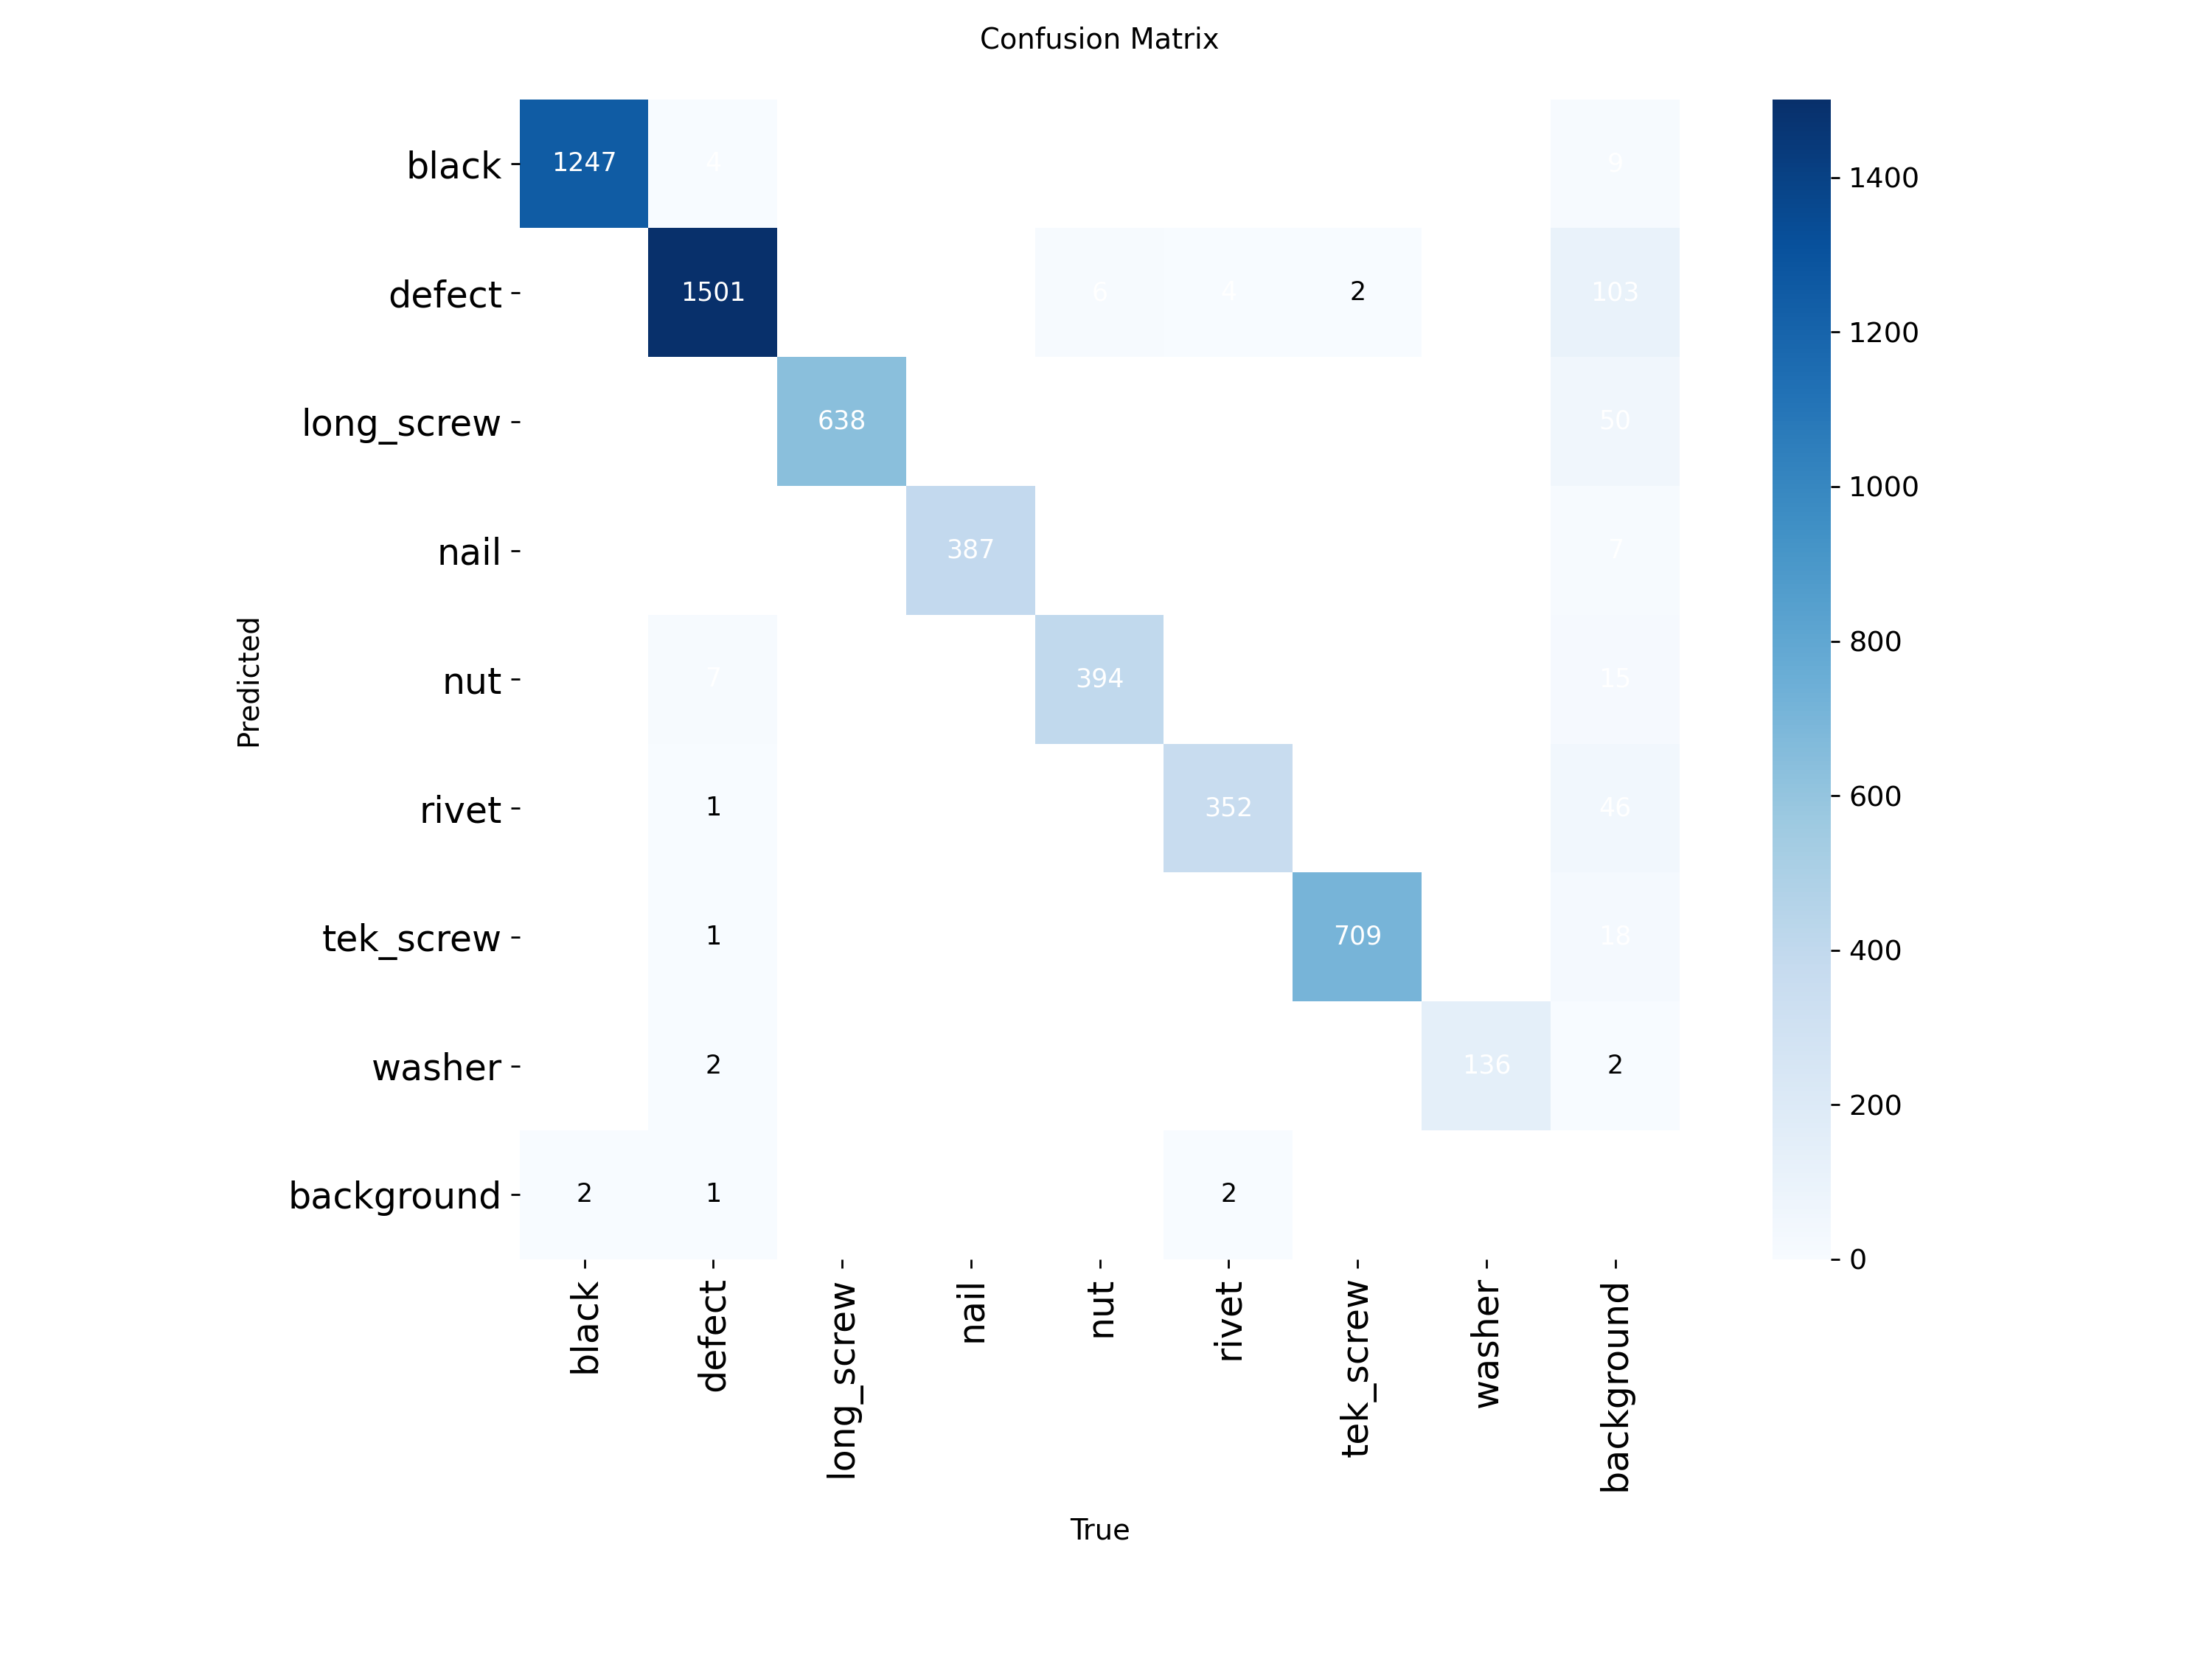

In [23]:
from IPython.display import Image, display

# Display confusion
confusion_matrix_path = os.path.join(output_directory, 'confusion_matrix.png')
display(Image(filename=confusion_matrix_path, width=600))

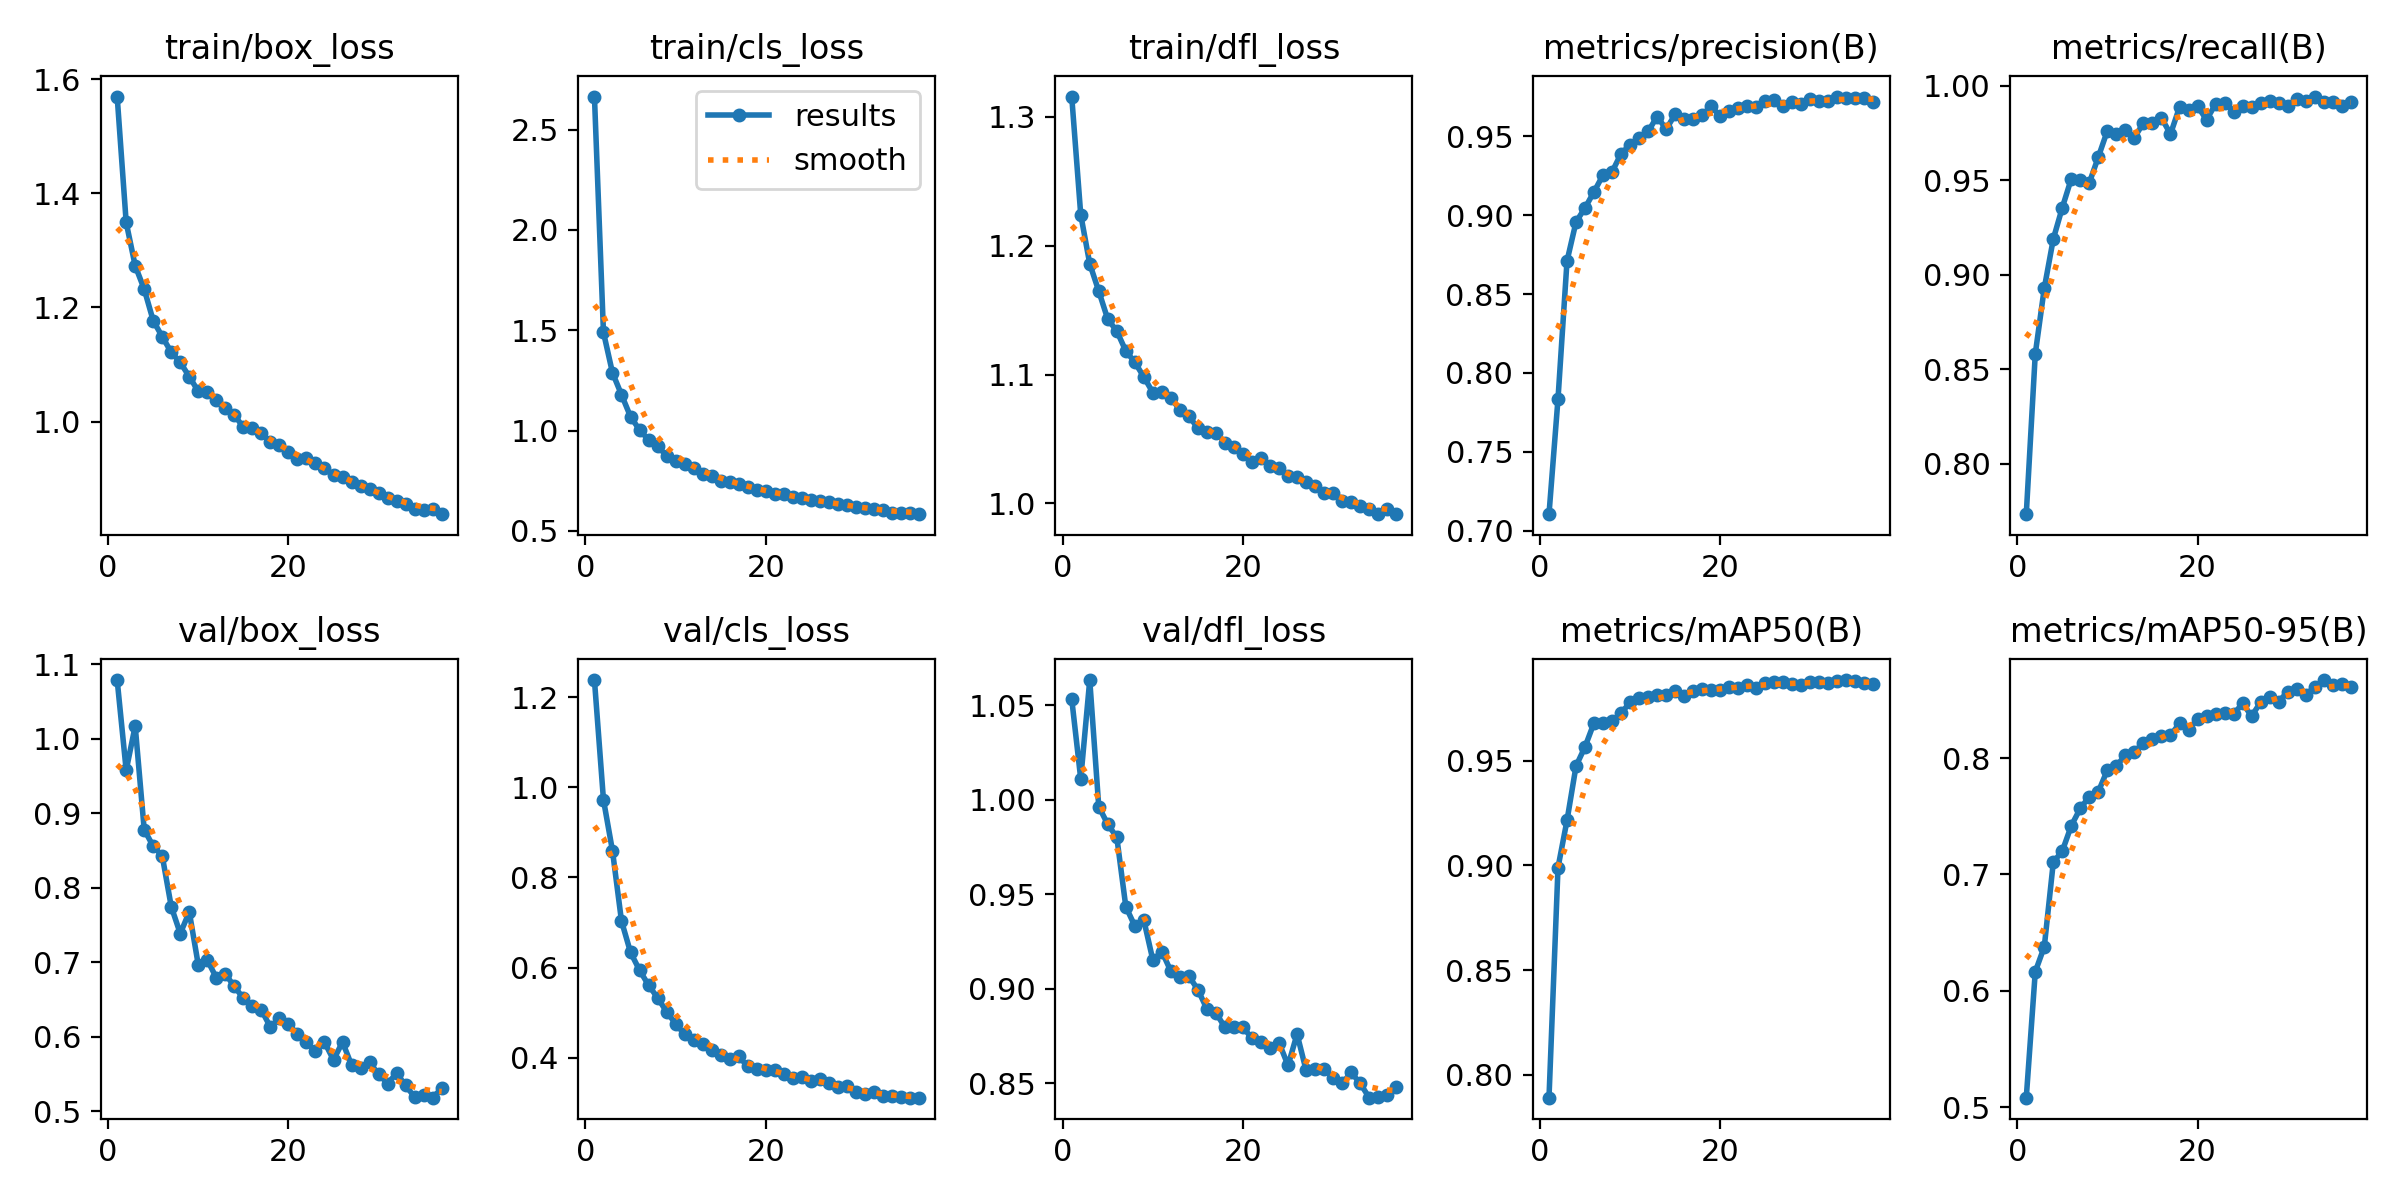

In [27]:
from IPython.display import Image, display

# Display training results
results_path = os.path.join(output_directory, 'results.png')
display(Image(filename=results_path, width=600))

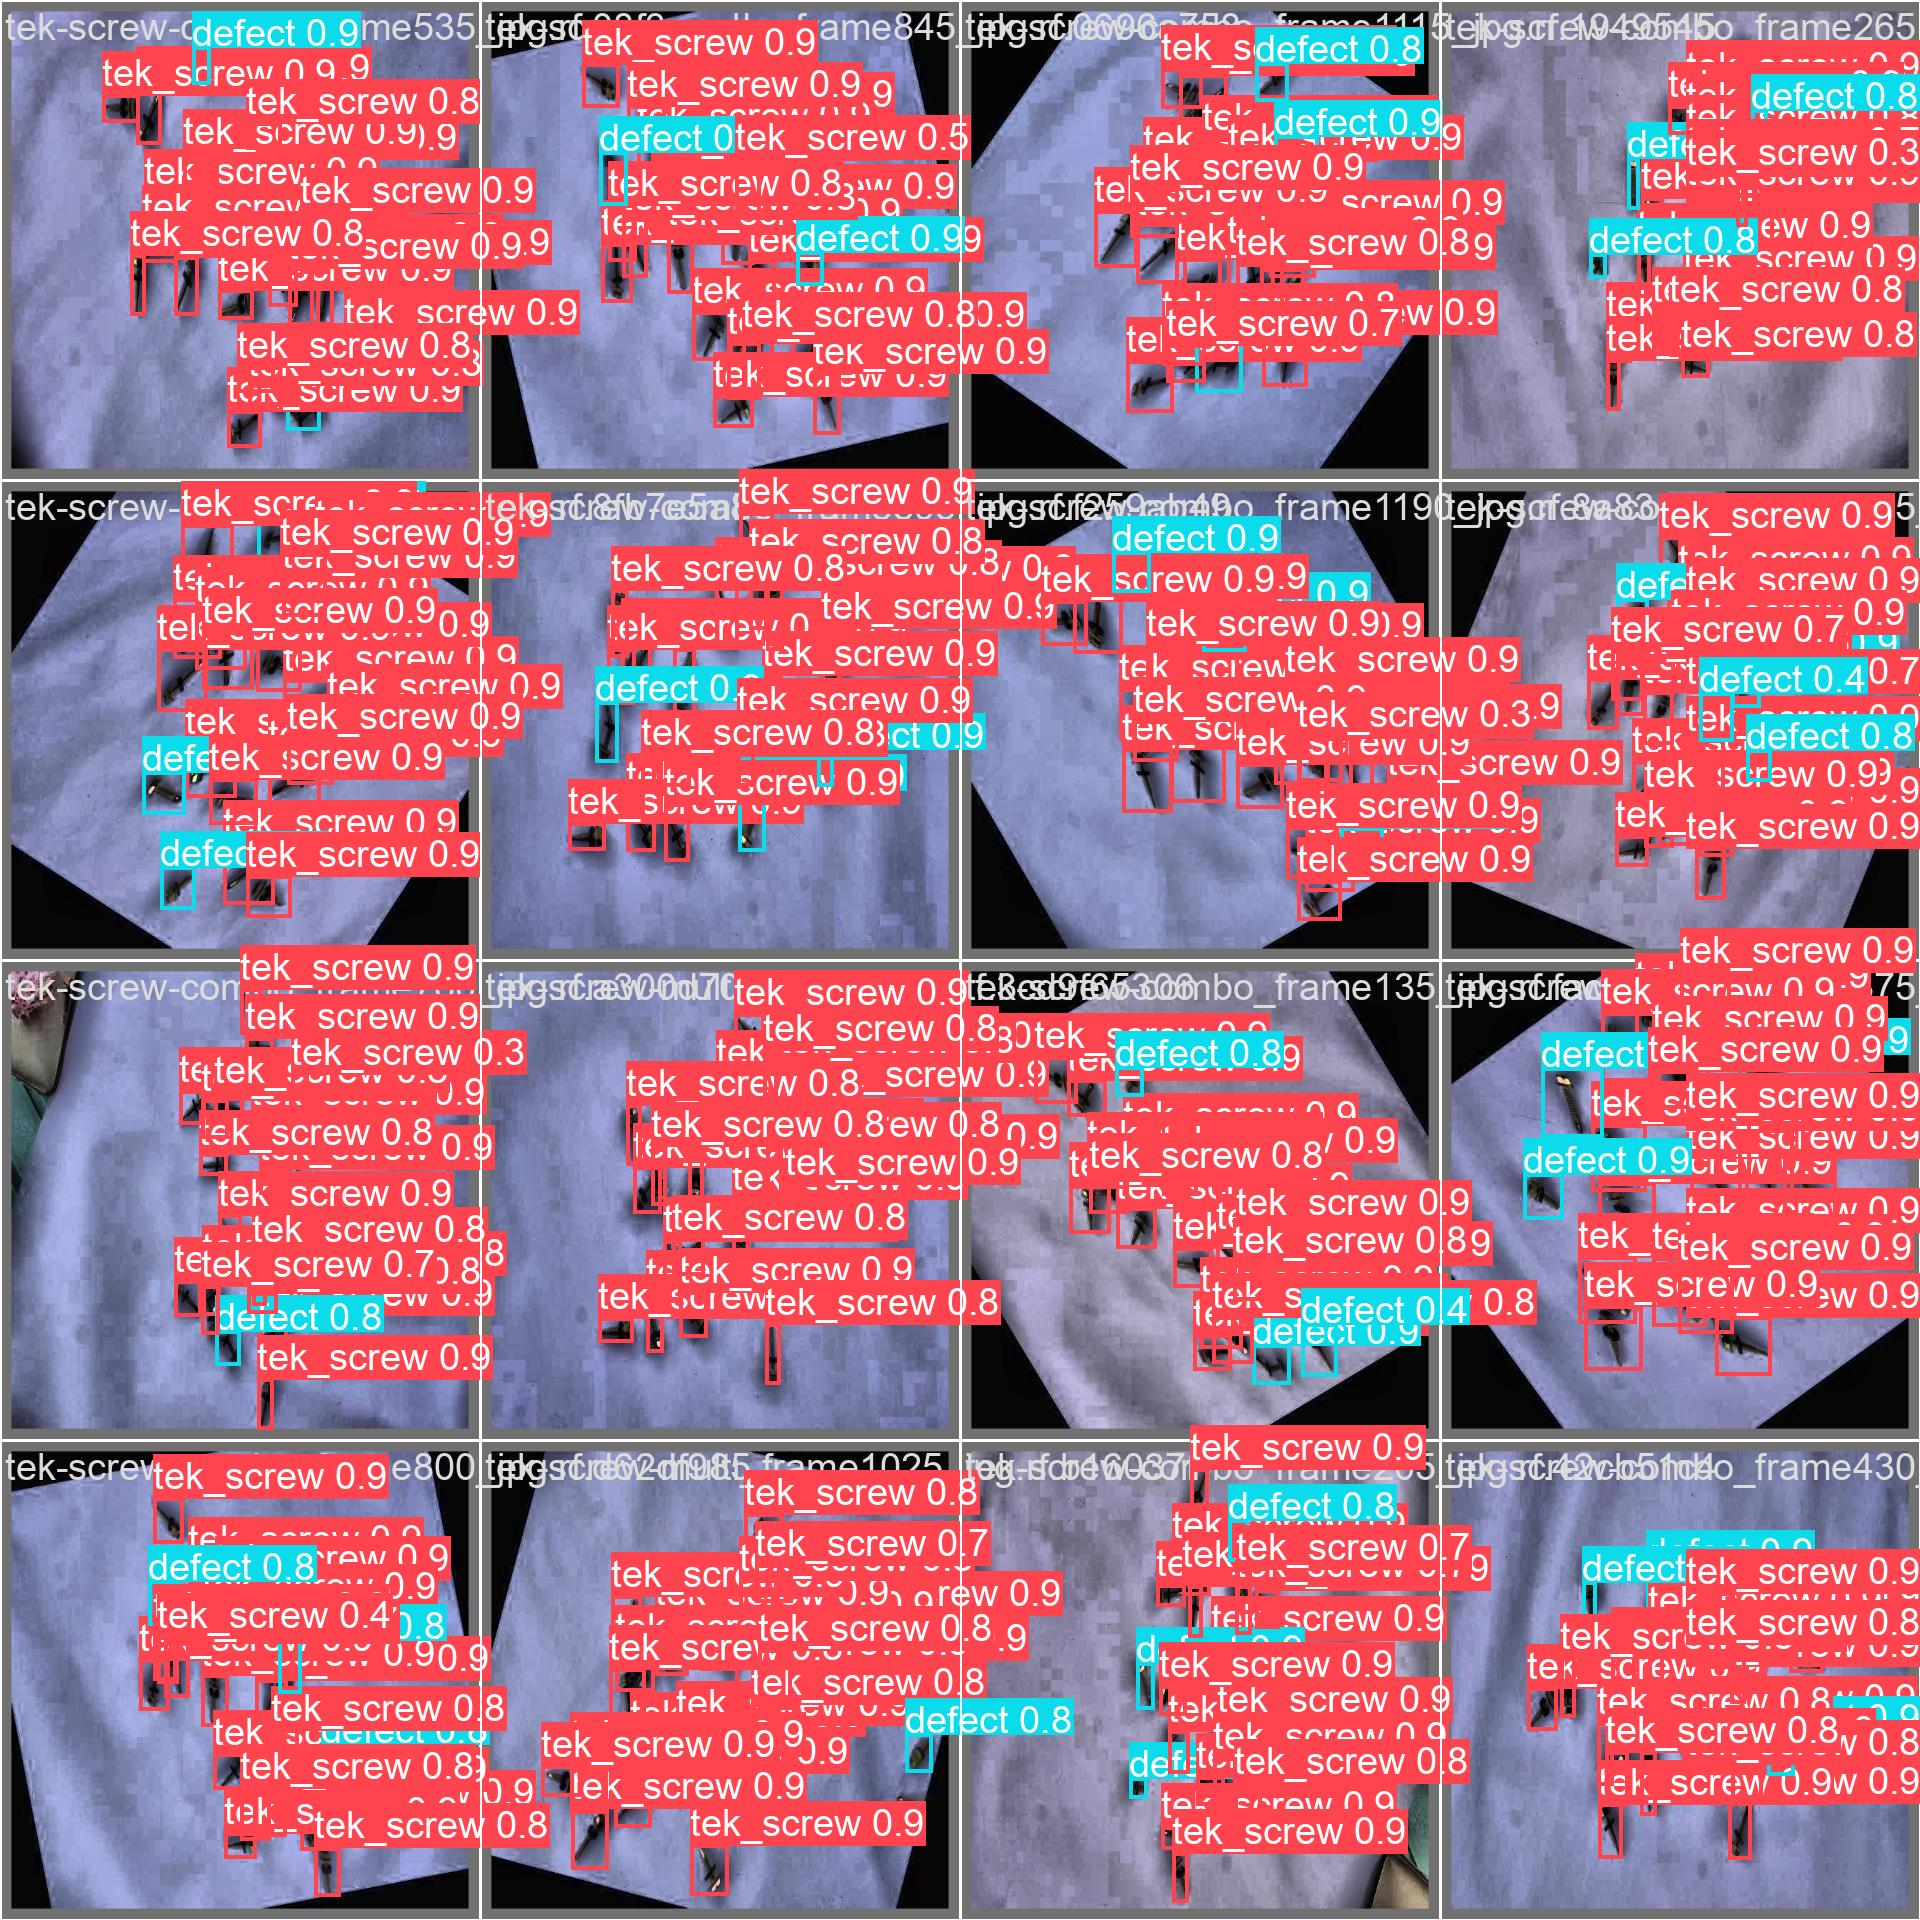

In [26]:
from IPython.display import Image, display

# Diplay validation
validation_image_file = os.path.join(output_directory, 'val_batch0_pred.jpg')
display(Image(filename=validation_image_file, width=600))

# TESTING MODELS

### TensorRT

In [31]:
# Load the exported TensorRT INT8 model
engine_model = YOLO("/content/yolo-object-counter-mlflow/yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.engine", task="detect")

# Run inference
result = engine_model.predict("/content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/black-combo_frame1055_jpg.rf.b8b6f7202f139d3cf5a0c738d1a822e8.jpg")

Loading /content/yolo-object-counter-mlflow/yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best.engine for TensorRT inference...

image 1/1 /content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/black-combo_frame1055_jpg.rf.b8b6f7202f139d3cf5a0c738d1a822e8.jpg: 640x640 21 blacks, 3 defects, 1.5ms
Speed: 2.8ms preprocess, 1.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


### ONNX

In [32]:
# Load the exported ONNX INT8 dynamic model
onnx_model  = YOLO("/content/yolo-object-counter-mlflow/yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best_int8_dynamic.onnx", task="detect")

# Run inference
result = onnx_model.predict("/content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/tek-screw-combo_frame950_jpg.rf.ceb2f9cbf9aec4250b968337717caf69.jpg")

Loading /content/yolo-object-counter-mlflow/yolov11_colab_runs/6dcf85a83ac54407abee75822583e70d/weights/best_int8_dynamic.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime with CUDA. Using CPU...
Using ONNX Runtime CPUExecutionProvider

image 1/1 /content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/tek-screw-combo_frame950_jpg.rf.ceb2f9cbf9aec4250b968337717caf69.jpg: 640x640 3 defects, 17 tek_screws, 84.0ms
Speed: 2.5ms preprocess, 84.0ms inference, 19.8ms postprocess per image at shape (1, 3, 640, 640)


# REGISTER MODEL

In [39]:
from mlflow.tracking import MlflowClient

# Model registry
def register_model(run_id, model_name):
    model_uri = f'runs:/{run_id}/model'

    return mlflow.register_model(model_uri=model_uri, name=model_name)

# Promote model
def promote_challenger_to_production(model_name, prod_name):
    client = MlflowClient()
    current_model_uri = f"models:/{model_name}@challenger"
    client.copy_model_version(src_model_uri=current_model_uri, dst_name=prod_name)

In [37]:
run_id = '6dcf85a83ac54407abee75822583e70d' # Get this from MLflow UI
model_name = 'best_int8_dynamic.onnx'
prod_name = 'yolo11n_android_production'

# Register model
model_details = register_model(run_id, model_name)
print(f'Registered model version: {model_details.version}')

Successfully registered model 'best_int8_dynamic.onnx'.
2025/06/01 15:25:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_int8_dynamic.onnx, version 1


Registered model version: 1


Created version '1' of model 'best_int8_dynamic.onnx'.


In [38]:
# Promote challenger to production => make sure to add challenger to the model alias
promote_challenger_to_production(model_name, prod_name)

Successfully registered model 'yolo11n_android_production'.
Copied version '1' of model 'best_int8_dynamic.onnx' to version '1' of model 'yolo11n_android_production'.
